In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler             #standardize the data to a common range 
from sklearn.model_selection import train_test_split         #split our data to training data and test data
from sklearn.feature_extraction.text import TfidfVectorizer  # need to change the text value to numerical values , otherwise the machine learning model cannot understand
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from matplotlib.colors import ListedColormap



In [3]:
raw_df = pd.read_csv(r"C:\Users\kelvin leung\Desktop\mail_data.csv")

In [4]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
raw_df.isnull().value_counts()

Category  Message
False     False      5572
Name: count, dtype: int64

In [6]:
fixed_df = raw_df.where((pd.notnull(raw_df)), " ")

In [7]:
fixed_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Labelling 

In [8]:
# spam = 0 , ham = 1

fixed_df.loc[fixed_df["Category"] == "spam", "Category",] = 0
fixed_df.loc[fixed_df["Category"] == "ham", "Category",] = 1

Now :

Spam = 0

ham = 1

# Sperating data into texts and label


In [9]:
X = fixed_df["Message"]

Y = fixed_df["Category"]

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Splitting the data into traning & testing 

In [12]:
# by using train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=3)

In [13]:
print(X.shape)
print(X_train.shape)  # 80% of data
print(X_test.shape)   # 20% of data

(5572,)
(4457,)
(1115,)


# Feature Extraction 

In [14]:
# transform text data to feature vector and then put into Logistic regression

feature_extraciton = TfidfVectorizer(min_df = 1, stop_words = "english", lowercase = True)


# TfidfVectorizer > go through all the texts from your data and give all the words some "score"
#                   e.g) if the words repeat multiple time, like "Free" in spam email, this word will have higher score; if the word only happens once, it will have lower score
#                   base on the score, the logistic regression can dectect and predict the email is belong spam or ham
#
# parameters: 
# min_df = 1 > the word has to appear at least once in the data 
# stop_words = "english" > those words which doesnt have much meaning like "the", "a", "is" etc will be ignored 
# lowercase = "True" > turnning all the text into lowercase


# Convert message(texts) into numbers

X_train_features =  feature_extraciton.fit_transform(X_train)
X_test_features =  feature_extraciton.transform(X_test)

#fit_transform > 1. fitting all the data into Vectorizer
#                2. transform all the texts to be numerucal data into X_train_feactures 


#Convert Y_train and Y_test values into integers

Y_test = Y_test.astype("int")
Y_train = Y_train.astype("int")

In [15]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [16]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# Training the model


Logistic Regression

In [17]:
model = LogisticRegression()

In [18]:
# training the Logistic Regression model with training data

model.fit(X_train_features, Y_train)


LogisticRegression()

# Evaluating the trained model

In [19]:
# prediction on training data 

# ask the model using X_train_features (score) to predict Y_train value (0/1 = spam/ham)

prediction_on_training_data =  model.predict(X_train_features)  # we don't provide Y_train value because we want the model find it by itself (0 or 1)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)  # compare true value (Y_train) to prediciton 

In [20]:
print(accuracy_on_training_data)

0.9670181736594121


Usually over 75% accuracy score already can be treaded as "good model", 96.7% accuracy score is very good

In [21]:
# prediction on test data 


prediction_on_test_data =  model.predict(X_test_features)  
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data) 

In [22]:
print(accuracy_on_test_data)

0.9659192825112107


Since the test accuracy and train accurarcy is close, this model didn't happen "overfitting" 

# Building prediction system

In [23]:
input_mail = ["Congratulations! You’ve won a free iPhone 12. To claim your prize, please follow the link below: [link]"]

# *** the above text is one of the spam mail exmaple from online, so the result of prediction on this should be 0 at the end


# convert texts into numerical values (using feature_extraciton)

input_mail_features = feature_extraciton.transform(input_mail)

# make prediction 

prediction = model.predict(input_mail_features)

print(prediction)



if prediction[0] == 1:
    print("Ham mail")
else:
    print("Spam mail")

[0]
Spam mail


In [24]:
print(raw_df["Category"].unique())

['ham' 'spam']


In [25]:
# Filter out rows with "unknown" label
fixed_df = raw_df[raw_df["Category"] != "unknown"]

Accuracy: 0.9659192825112107


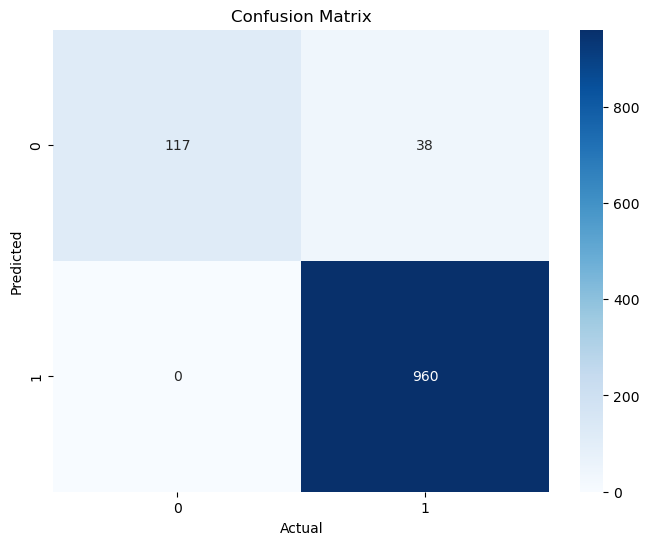

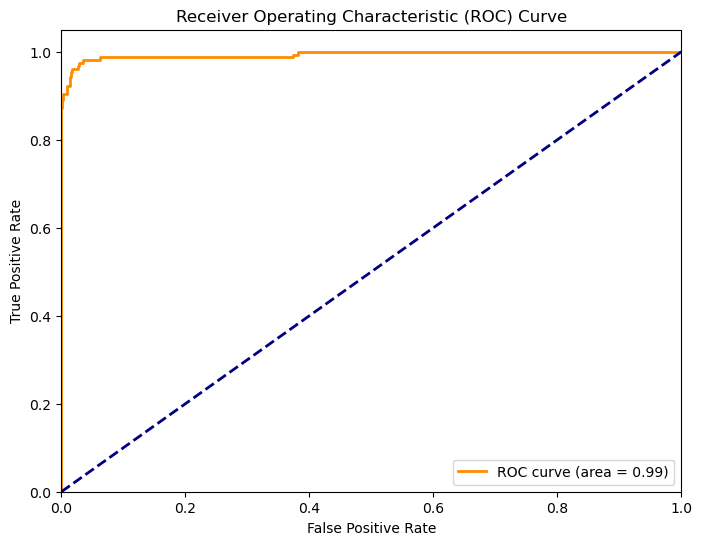

In [26]:

# Separating data into texts and labels
X = fixed_df["Message"]
y = fixed_df["Category"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluating the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Decision Boundary Plot
# (Add the code for the Decision Boundary Plot from the previous response)

# Confusion Matrix
cm = confusion_matrix(Y_test, prediction_on_test_data)           #(y_test, y_pred) 
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# ROC Curve
# Convert the target classes to {0, 1}
y_test_binary = np.where(y_test == 'ham', 0, 1)
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Spam = 0

ham = 1
